# Model Validation

For this activity, we are going to validate a couple of KNN classifiers.


- First, we are going to create our datasets. Our data is going to be a merge of two two-dimensional tables. Each table will be have a normal distribution, with its own mean and variance.

- Then, we are going to train a KNN classifier to distinguish rows from each of the original datasets.

- Finally, we are going to validate our model and test different methods of validation, and hyperparameters exploration.


The first thing we have to do then, is create our dataset:

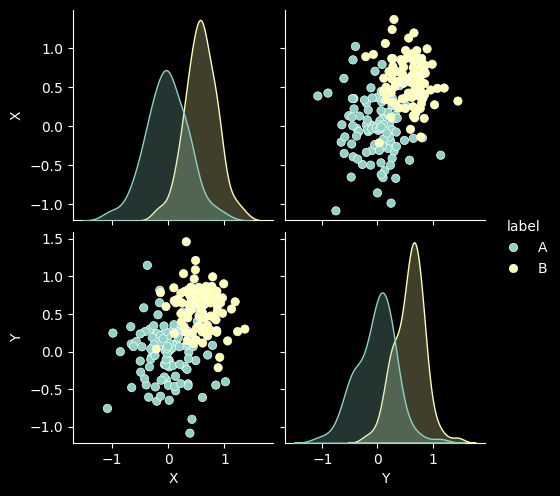

In [27]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

seed = 1
features_amount = 2
df1 = pd.DataFrame(np.random.default_rng(seed).normal(loc = 0, scale=.4, size=(100, features_amount)), columns=["X", "Y"])
df2 = pd.DataFrame(np.random.default_rng(seed).normal(loc = .6, scale=.3, size=(100, features_amount)), columns=["X", "Y"])

# Add a label column to each df and merge both

df1.insert(0, "label", "A")
df2.insert(0, "label", "B")

df3 = pd.concat([df1, df2])
sns.pairplot(df3, hue="label")

## Training and Testing

Now that we have presented the data, we are going to split the dataset in half (a training set and testing set). After that we will train our model and take a look at its performance.

Classification report for classifier KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           A       0.95      0.88      0.91        48
           B       0.89      0.96      0.93        52

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100




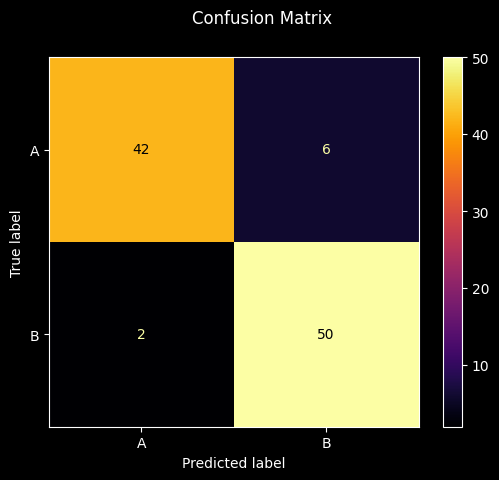

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(df3[["X", "Y"]], df3["label"], test_size=0.5, random_state=1) 


neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)

y_predicted = neigh.predict(X_test)

print("Classification report for classifier {}\n{}\n".format(neigh, metrics.classification_report(y_test, y_predicted)))

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predicted, cmap='inferno')
disp.figure_.suptitle("Confusion Matrix")
plt.show()

## Model validation with K-Fold method.

Now let's try K-fold cross validation. We will split our data into different test and train sets (after shuffling), and compare the resulting models performance.

Classification report for classifier KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           A       0.88      0.93      0.90        40
           B       0.92      0.88      0.90        40

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80




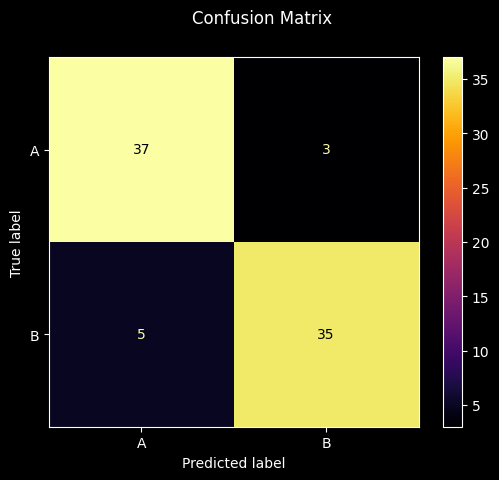

Classification report for classifier KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           A       0.95      0.88      0.91        40
           B       0.88      0.95      0.92        40

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80




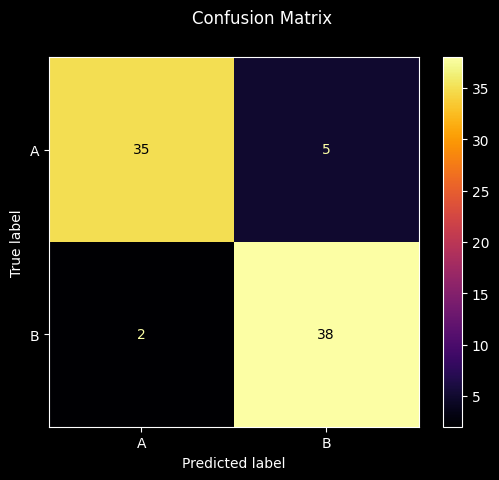

Classification report for classifier KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           A       0.95      0.90      0.92        40
           B       0.90      0.95      0.93        40

    accuracy                           0.93        80
   macro avg       0.93      0.93      0.92        80
weighted avg       0.93      0.93      0.92        80




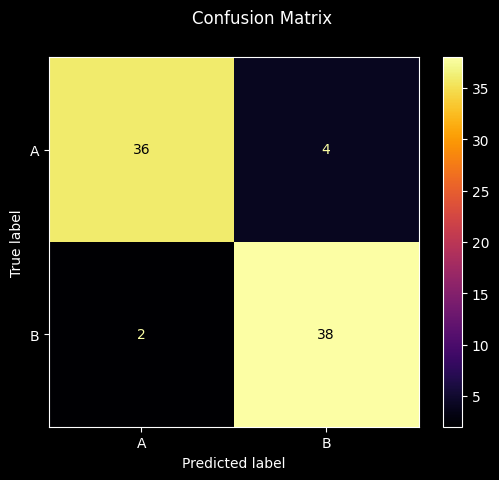

Classification report for classifier KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           A       0.88      0.95      0.92        40
           B       0.95      0.88      0.91        40

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80




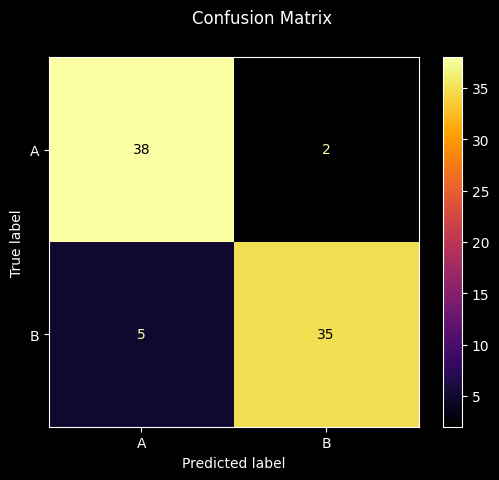

Classification report for classifier KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           A       0.91      0.97      0.94        40
           B       0.97      0.90      0.94        40

    accuracy                           0.94        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80




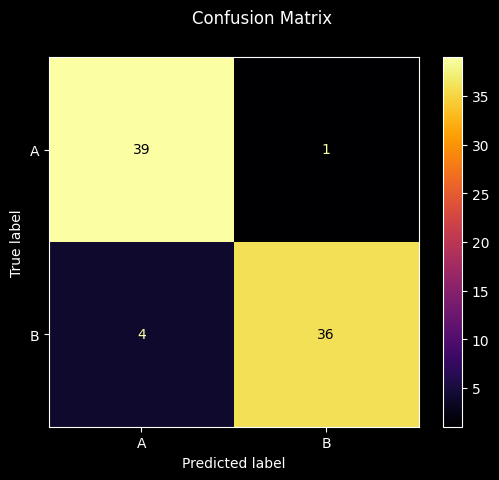

In [29]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=1)



for i, (train_index, test_index) in enumerate(kf.split(X=df3[["X", "Y"]])):
    X_train = df3.loc[df3.index[train_index], ['X', 'Y']]
    X_test = df3.loc[df3.index[test_index], ['X', 'Y']]
    y_train = df3.loc[df3.index[train_index], ["label"]]
    y_test = df3.loc[df3.index[test_index], ["label"]]

    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)

    neigh = KNeighborsClassifier(n_neighbors=10)
    neigh.fit(X_train, y_train)

    y_predicted = neigh.predict(X_test)

    print("Classification report for classifier {}\n{}\n".format(neigh, metrics.classification_report(y_test, y_predicted)))

    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predicted, cmap='inferno')
    disp.figure_.suptitle("Confusion Matrix")
    plt.show()

### Validation Conclusion

As we can see, the results vary from set to set, but overall they keep a high f1 score, ranging from .9 to .94. This small result serves to showcase how we could get misleading models on the outsides of the performance range. That is the value of K-fold validation.

## Hyperparameter exploration with Grid Search

Last thing pending is performing a hyperparameter exploration with a Grid Search. This will help us find the better hyperparameters for our KNN model.

In [30]:
from sklearn.model_selection import GridSearchCV

estimator_KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),
    }
                   
# with GridSearch
grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

KNN_1=grid_search_KNN.fit(X_train, y_train)
y_pred_KNN1 =KNN_1.predict(X_test)

#Parameter setting that gave the best results on the hold out data.
print(grid_search_KNN.best_params_ ) 
#Mean cross-validated score of the best_estimator
print('Best Score - KNN:', grid_search_KNN.best_score_ )

{'leaf_size': 20, 'metric': 'chebyshev', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Best Score - KNN: 0.9875


Great! We just made an exploration of the hyperparameters for KNN, so what now? We can see a selection of the best parameters and the best score (remember we had a score ranging from .9 to .94 in our [previous experiment](#validation-conclusion)). There is evident improvement in the results for our model based on these new parameters. But just to be sure, let's use try a K-fold approach again, this time with the new parameters.

## Final results (K-fold + GridSearch HParams)

Classification report for classifier KNeighborsClassifier(leaf_size=20, metric='chebyshev', n_neighbors=10, p=1,
                     weights='distance')
              precision    recall  f1-score   support

           A       0.95      1.00      0.98        40
           B       1.00      0.95      0.97        40

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80




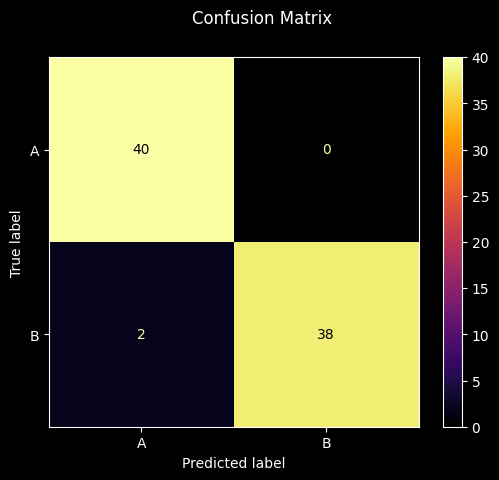

Classification report for classifier KNeighborsClassifier(leaf_size=20, metric='chebyshev', n_neighbors=10, p=1,
                     weights='distance')
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        40
           B       1.00      1.00      1.00        40

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80




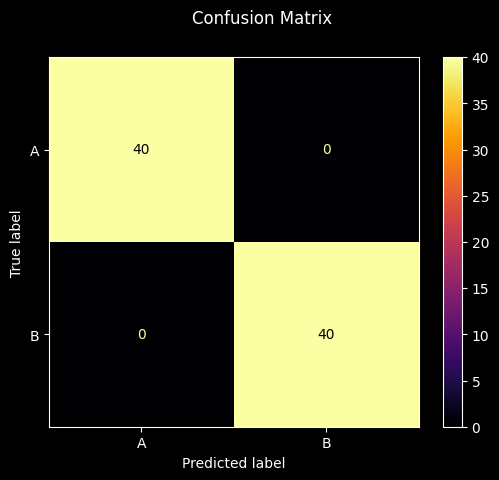

Classification report for classifier KNeighborsClassifier(leaf_size=20, metric='chebyshev', n_neighbors=10, p=1,
                     weights='distance')
              precision    recall  f1-score   support

           A       1.00      0.95      0.97        40
           B       0.95      1.00      0.98        40

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80




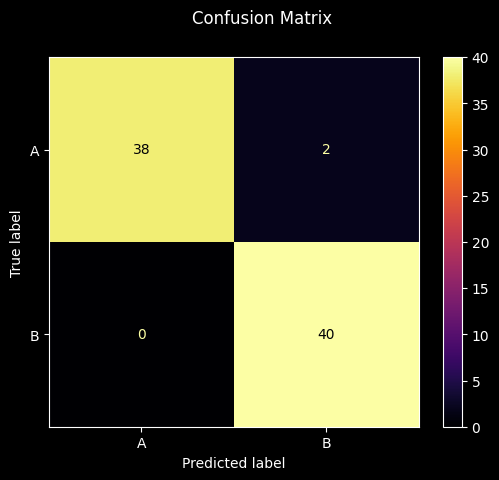

Classification report for classifier KNeighborsClassifier(leaf_size=20, metric='chebyshev', n_neighbors=10, p=1,
                     weights='distance')
              precision    recall  f1-score   support

           A       1.00      1.00      1.00        40
           B       1.00      1.00      1.00        40

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80




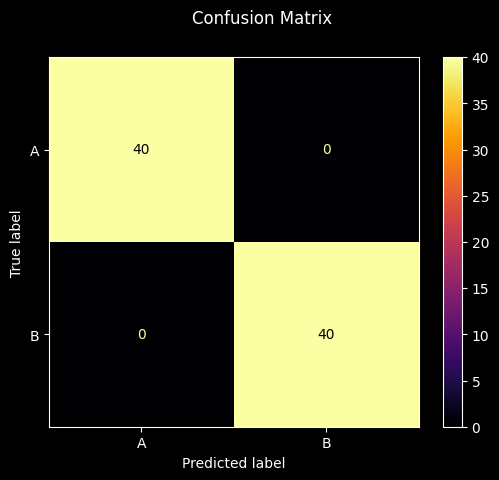

Classification report for classifier KNeighborsClassifier(leaf_size=20, metric='chebyshev', n_neighbors=10, p=1,
                     weights='distance')
              precision    recall  f1-score   support

           A       0.95      1.00      0.98        40
           B       1.00      0.95      0.97        40

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80




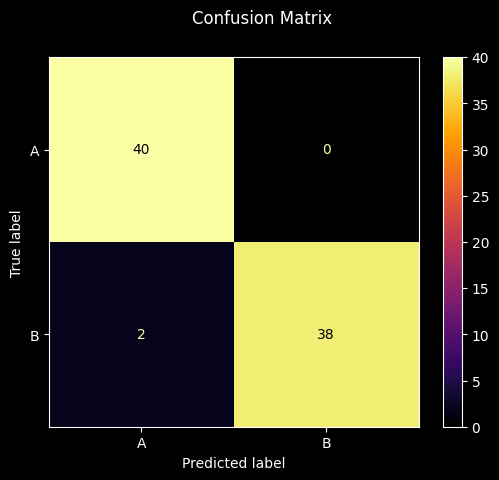

In [31]:
for i, (train_index, test_index) in enumerate(kf.split(X=df3[["X", "Y"]])):
    X_train = df3.loc[df3.index[train_index], ['X', 'Y']]
    X_test = df3.loc[df3.index[test_index], ['X', 'Y']]
    y_train = df3.loc[df3.index[train_index], ["label"]]
    y_test = df3.loc[df3.index[test_index], ["label"]]

    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)

    neigh = KNeighborsClassifier(n_neighbors=10, leaf_size=20, metric='chebyshev', p=1, weights='distance')
    neigh.fit(X_train, y_train)

    y_predicted = neigh.predict(X_test)

    print("Classification report for classifier {}\n{}\n".format(neigh, metrics.classification_report(y_test, y_predicted)))

    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predicted, cmap='inferno')
    disp.figure_.suptitle("Confusion Matrix")
    plt.show()